In [ ]:
import pandas as pd
import numpy as np

In [ ]:
alsi = pd.read_csv('/content/alsimap_smooth.csv')
casi = pd.read_csv('/content/casimap_smooth.csv')
fesi = pd.read_csv('/content/fesimap_smooth.csv')
mercury_top = pd.read_csv('/content/mercury-albedo-top-half.png.csv')
ssi = pd.read_csv('/content/ssimap_smooth.csv')

In [ ]:
alsi = alsi.values.flatten()
casi = casi.values.flatten()
fesi = fesi.values.flatten()
top_m = mercury_top.values.flatten()
ssi = ssi.values.flatten()

In [ ]:
alsi_Map = alsi.reshape(len(alsi),1)
casi_Map = casi.reshape(len(casi),1)
fesi_Map = fesi.reshape(len(fesi),1)
top_Map = top_m.reshape(len(top_m),1)
ssi_Map = ssi.reshape(len(ssi),1)

In [ ]:
Sol = np.hstack((alsi_Map ,casi_Map , fesi_Map , ssi_Map , top_Map))

In [ ]:
df = pd.DataFrame(Sol, columns =['alsi_Map' ,'casi_Map' , 'fesi_Map' , 'ssi_Map' , 'top_Map']) 

In [ ]:
df.shape

(1035360, 5)

In [ ]:
df.to_csv('Final_Mercury_Train.csv')

In [2]:
import pandas as pd
data=pd.read_csv('/content/Final_Mercury_Train.csv')
data.head()

,Unnamed: 0,alsi_Map,casi_Map,fesi_Map,ssi_Map,top_Map
0,0,0.0,0.0,0.0,0.0,0.486275
1,1,0.0,0.0,0.0,0.0,0.498039
2,2,0.0,0.0,0.0,0.0,0.521569
3,3,0.0,0.0,0.0,0.0,0.529412
4,4,0.0,0.0,0.0,0.0,0.541176


In [3]:
data.shape

(1035360, 6)

In [4]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [5]:
X = data['top_Map'].values.reshape(-1,1)
y = data.drop(['top_Map'],axis=1)




In [6]:



# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3246, splitter='best')


regressor.fit(X, y)




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3246, splitter='best')

In [7]:
import pandas as pd
test=pd.read_csv('/content/mercury-albedo-resized-bottom-half.png.csv')


In [8]:
test = test.values.flatten()

In [9]:
test_Map = test.reshape(len(test),1)

In [10]:
y_pred = regressor.predict(test_Map)

In [11]:
# example of calculate the mean squared error
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y, y_pred)
# report error
print(errors)

0.07325897271770831


In [ ]:
#regressor.predict([0.541176].reshape(-1,1))

(0.07943282347242814,
 12.589254117941675,
 0.08912509381337455,
 12.59894638828262)

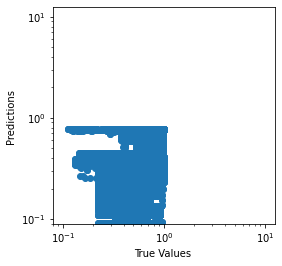

In [48]:
import matplotlib.pyplot as plt

g=plt.scatter(y, y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')